In [30]:
% load_ext autoreload
% autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
from dataset import *
from model import *
from solver import *

import os

In [32]:
root = os.path.join("..", "data", "stage_1_train_images")
anno_class_path = os.path.join("..", "data", "stage_1_detailed_class_info.csv")
anno_bbox_path = os.path.join("..", "data", "stage_1_train_labels.csv")
data_train = RSNADataset(root, anno_class_path, anno_bbox_path)

In [33]:
ac = data_train.anno_class
ab = data_train.anno_bbox

In [34]:
ac["class"].value_counts()

No Lung Opacity / Not Normal    11500
Lung Opacity                     8964
Normal                           8525
Name: class, dtype: int64

In [35]:
import pandas as pd

In [36]:
df = pd.merge(ab, ac, left_on='patientId', right_on='patientId', how='inner')

In [73]:
df.head(10)

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity
6,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1,Lung Opacity
7,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1,Lung Opacity
8,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
9,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal


In [74]:
def test(item):
    print(item["patientId"])

In [75]:
df.groupby("patientId").agg(test)

0    0004cfab-14fd-4e49-80ba-63a80b6bddd6
Name: patientId, dtype: object
1    00313ee0-9eaa-42f4-b0ab-c148ed3241cd
Name: patientId, dtype: object
2    00322d4d-1c29-4943-afc9-b6754be640eb
Name: patientId, dtype: object
3    003d8fa0-6bf1-40ed-b54c-ac657f8495c5
Name: patientId, dtype: object
4    00436515-870c-4b36-a041-de91049b9ab4
5    00436515-870c-4b36-a041-de91049b9ab4
6    00436515-870c-4b36-a041-de91049b9ab4
7    00436515-870c-4b36-a041-de91049b9ab4
Name: patientId, dtype: object
8    00569f44-917d-4c86-a842-81832af98c30
Name: patientId, dtype: object
9    006cec2e-6ce2-4549-bffa-eadfcd1e9970
Name: patientId, dtype: object
10    00704310-78a8-4b38-8475-49f4573b2dbb
11    00704310-78a8-4b38-8475-49f4573b2dbb
12    00704310-78a8-4b38-8475-49f4573b2dbb
13    00704310-78a8-4b38-8475-49f4573b2dbb
Name: patientId, dtype: object
14    008c19e8-a820-403a-930a-bc74a4053664
Name: patientId, dtype: object
15    009482dc-3db5-48d4-8580-5c89c4f01334
Name: patientId, dtype: object
16    009eb2

Name: patientId, dtype: object
487    06fc2885-127a-4274-b20c-554d352ea21b
488    06fc2885-127a-4274-b20c-554d352ea21b
489    06fc2885-127a-4274-b20c-554d352ea21b
490    06fc2885-127a-4274-b20c-554d352ea21b
Name: patientId, dtype: object
491    0700bc73-b6e3-412e-9e2f-aa0b83424804
Name: patientId, dtype: object
492    07015c3f-79d8-4340-9baf-255b2a5418bd
Name: patientId, dtype: object
493    07017f27-dee5-4979-8463-48459689cfc3
Name: patientId, dtype: object
494    0702a884-c189-4a05-bcf5-dc72f4f406fc
495    0702a884-c189-4a05-bcf5-dc72f4f406fc
496    0702a884-c189-4a05-bcf5-dc72f4f406fc
497    0702a884-c189-4a05-bcf5-dc72f4f406fc
Name: patientId, dtype: object
498    07045469-bbc4-42ca-a8b9-9c83ef77f704
Name: patientId, dtype: object
499    07075b45-c83b-4e9a-971e-4b6c4554a0ef
500    07075b45-c83b-4e9a-971e-4b6c4554a0ef
501    07075b45-c83b-4e9a-971e-4b6c4554a0ef
502    07075b45-c83b-4e9a-971e-4b6c4554a0ef
Name: patientId, dtype: object
503    070c921f-171c-420c-915b-e49e3f600c38
504 

1062    0a51f668-b7b1-4d8d-9ab9-de1f702f071a
Name: patientId, dtype: object
1063    0a55219b-5303-4490-b173-6039f355db2f
Name: patientId, dtype: object
1064    0a578f72-dced-4550-8851-d8005549b724
Name: patientId, dtype: object
1065    0a5a6574-d94d-441f-afe4-115ba66b322e
Name: patientId, dtype: object
1066    0a5b4860-e6ab-4737-a389-9d0cf7300770
Name: patientId, dtype: object
1067    0a5c4dcb-33ac-4466-9dbf-42ed5c8ec1f0
Name: patientId, dtype: object
1068    0a628951-4482-4d01-a09a-9e590b886cf2
Name: patientId, dtype: object
1069    0a62df77-7459-4acc-9cca-a62c2cec4b0f
1070    0a62df77-7459-4acc-9cca-a62c2cec4b0f
1071    0a62df77-7459-4acc-9cca-a62c2cec4b0f
1072    0a62df77-7459-4acc-9cca-a62c2cec4b0f
Name: patientId, dtype: object
1073    0a63a331-3e17-4e23-8a9f-f7a4ec850a1b
Name: patientId, dtype: object
1074    0a66f58c-f98d-41d1-89af-4e0136888e13
1075    0a66f58c-f98d-41d1-89af-4e0136888e13
1076    0a66f58c-f98d-41d1-89af-4e0136888e13
1077    0a66f58c-f98d-41d1-89af-4e0136888e13
N

Name: patientId, dtype: object
1619    0f19df40-34dc-49c5-8a24-2879431284b2
Name: patientId, dtype: object
1620    0f1fced1-4c33-44b2-9009-1370aa6287f3
1621    0f1fced1-4c33-44b2-9009-1370aa6287f3
1622    0f1fced1-4c33-44b2-9009-1370aa6287f3
1623    0f1fced1-4c33-44b2-9009-1370aa6287f3
Name: patientId, dtype: object
1624    0f2bce55-7193-45d0-8223-d978b550477a
1625    0f2bce55-7193-45d0-8223-d978b550477a
1626    0f2bce55-7193-45d0-8223-d978b550477a
1627    0f2bce55-7193-45d0-8223-d978b550477a
Name: patientId, dtype: object
1628    0f3ac29b-7682-4402-bbe5-89e4add87639
Name: patientId, dtype: object
1629    0f712b0f-1966-40e9-a66a-1025198a6966
Name: patientId, dtype: object
1630    0f7aad9e-fc37-4689-8c84-3a83a6bd79b0
Name: patientId, dtype: object
1631    0f831256-0a69-4fe5-9719-1563d2b6b7b9
Name: patientId, dtype: object
1632    0f8c91da-7e03-480e-8760-1604b1d53c97
Name: patientId, dtype: object
1633    0f8f22cd-112a-47c5-8069-d767ed01b112
Name: patientId, dtype: object
1634    0f938aa

Name: patientId, dtype: object
2037    166479fb-b1f7-494c-b894-2ddf6d21131a
2038    166479fb-b1f7-494c-b894-2ddf6d21131a
2039    166479fb-b1f7-494c-b894-2ddf6d21131a
2040    166479fb-b1f7-494c-b894-2ddf6d21131a
Name: patientId, dtype: object
2041    16654928-ac45-4cea-bb79-e97b9b02d012
Name: patientId, dtype: object
2042    16684018-3675-449d-9a90-8839353c193c
Name: patientId, dtype: object
2043    1668be84-8c1e-4f22-9a54-b88d285043dc
Name: patientId, dtype: object
2044    166d5e60-e48a-41d8-85d3-4e853a3d5929
Name: patientId, dtype: object
2045    16729ed9-6a28-4b2d-a7b7-adcbf82ba1f3
Name: patientId, dtype: object
2046    16758f5e-cd88-4484-83b8-96bdf97f9b58
Name: patientId, dtype: object
2047    16775991-c274-45ad-8413-6c3382db4418
Name: patientId, dtype: object
2048    1677cfe0-e54f-4672-b49c-36cfd12ec76b
Name: patientId, dtype: object
2049    1677d8e0-7c1c-4052-923b-4fc0061c2ebd
Name: patientId, dtype: object
2050    1678b850-2b76-4d6c-8f8f-bf1503e2d761
Name: patientId, dtype: objec

2441    192c7502-0bb4-4479-ae6c-9ff142f1c684
Name: patientId, dtype: object
2442    192d20c8-ae48-45ff-b888-3e77b1c1d7e6
Name: patientId, dtype: object
2443    192e8e4a-4db4-4c04-9b74-297e15b87c8e
Name: patientId, dtype: object
2444    192f3509-9413-44f1-a585-57829f15ad38
2445    192f3509-9413-44f1-a585-57829f15ad38
2446    192f3509-9413-44f1-a585-57829f15ad38
2447    192f3509-9413-44f1-a585-57829f15ad38
Name: patientId, dtype: object
2448    192f8bc4-1d12-4b3e-84a6-d94f77928faf
2449    192f8bc4-1d12-4b3e-84a6-d94f77928faf
2450    192f8bc4-1d12-4b3e-84a6-d94f77928faf
2451    192f8bc4-1d12-4b3e-84a6-d94f77928faf
Name: patientId, dtype: object
2452    193614a7-cca5-4108-a812-513722a6af08
Name: patientId, dtype: object
2453    19370915-6723-41fe-be09-29defbd9b7c1
Name: patientId, dtype: object
2454    19377a2b-4f78-42f5-bbde-27c797d84cfb
2455    19377a2b-4f78-42f5-bbde-27c797d84cfb
2456    19377a2b-4f78-42f5-bbde-27c797d84cfb
2457    19377a2b-4f78-42f5-bbde-27c797d84cfb
Name: patientId, d

Name: patientId, dtype: object
2890    280bb7b4-408c-46c4-b0e8-a681722421c9
Name: patientId, dtype: object
2891    2813f946-febb-4b81-8ad7-15908aa47bc1
Name: patientId, dtype: object
2892    281d879b-1f4a-4ef9-a88a-c311d31415ab
Name: patientId, dtype: object
2893    283be94e-ba07-4525-aaf4-3a4b6d884cdc
Name: patientId, dtype: object
2894    284a890a-955c-48a3-b085-14363c3c5d89
Name: patientId, dtype: object
2895    284e095a-2c52-445d-9dd5-93c45021a7b7
2896    284e095a-2c52-445d-9dd5-93c45021a7b7
2897    284e095a-2c52-445d-9dd5-93c45021a7b7
2898    284e095a-2c52-445d-9dd5-93c45021a7b7
Name: patientId, dtype: object
2899    2875f1b1-25d0-455a-b098-728ae2ee84ce
Name: patientId, dtype: object
2900    288f94e4-143c-4eaa-8353-7a0fecb52437
Name: patientId, dtype: object
2901    28a26212-fc5c-4944-9afc-054c466995e7
Name: patientId, dtype: object
2902    28b800b9-9a1f-452a-a13f-381369f4d8f7
Name: patientId, dtype: object
2903    28b86891-adae-4c32-9f79-952ab727d1e7
Name: patientId, dtype: objec

3529    328335a7-1521-4a38-bf82-34db1d2e7de2
Name: patientId, dtype: object
3530    3283404d-1d5b-4498-99d7-7bc636e98456
Name: patientId, dtype: object
3531    328ade86-b606-44ba-900d-d85e14d7096e
Name: patientId, dtype: object
3532    328b2a99-e908-4cfb-8efd-9c5dbbe1d855
Name: patientId, dtype: object
3533    328ca6d8-ae49-41ad-9e58-823c8049b1bb
3534    328ca6d8-ae49-41ad-9e58-823c8049b1bb
3535    328ca6d8-ae49-41ad-9e58-823c8049b1bb
3536    328ca6d8-ae49-41ad-9e58-823c8049b1bb
Name: patientId, dtype: object
3537    328ffa15-a1fe-4d51-865e-aa4c1855c9df
Name: patientId, dtype: object
3538    3295c5b1-e285-407e-93c3-13f9fd636276
Name: patientId, dtype: object
3539    329bc865-0bae-4268-8eed-32bba16e34dd
Name: patientId, dtype: object
3540    329c254a-e6bc-44cf-bc09-365d5d43f4df
Name: patientId, dtype: object
3541    329e55d1-2e27-4ffe-95b1-df5f5015aae6
Name: patientId, dtype: object
3542    32a538ce-d71d-4a1d-b0b2-865111dc5136
Name: patientId, dtype: object
3543    32a5977f-f8ab-41c9-9b

4278    35ab8f3b-8ec0-4e59-9d5b-74d526914d66
Name: patientId, dtype: object
4279    35aea96c-a183-4e11-b13e-f887f9a59d6d
Name: patientId, dtype: object
4280    35b69e13-ffe9-4034-8d6c-32b5ad8e8b1f
Name: patientId, dtype: object
4281    35b74418-4c61-42dd-932d-94021f9a75f9
Name: patientId, dtype: object
4282    35b7784f-f4e5-453c-9d6b-e6c1eff5c7be
Name: patientId, dtype: object
4283    35b79607-9453-4a1f-a53f-8334a1b8de5f
Name: patientId, dtype: object
4284    35ba6cd0-4faa-4fb3-a25f-49295d0fd33c
Name: patientId, dtype: object
4285    35bcc518-3d98-491e-b997-4ee1fb2a877c
Name: patientId, dtype: object
4286    35bdb4ca-55d0-4d4c-b2e6-ea721f24d985
Name: patientId, dtype: object
4287    35c0dbf0-11f1-4f62-b5ed-ef58ea4d6c04
Name: patientId, dtype: object
4288    35c10804-455b-4753-aaf6-72cd9a4916eb
Name: patientId, dtype: object
4289    35c45480-3cfc-4988-8bd7-4c1ee56ed88b
4290    35c45480-3cfc-4988-8bd7-4c1ee56ed88b
4291    35c45480-3cfc-4988-8bd7-4c1ee56ed88b
4292    35c45480-3cfc-4988-8b

Name: patientId, dtype: object
5155    39d5e1bf-8092-4bc7-af98-f2a5dcd4c39d
Name: patientId, dtype: object
5156    39d614d3-7077-4a48-813e-60e8b36734fd
Name: patientId, dtype: object
5157    39d6260d-397c-46cc-bdac-c8e908a91f6e
5158    39d6260d-397c-46cc-bdac-c8e908a91f6e
5159    39d6260d-397c-46cc-bdac-c8e908a91f6e
5160    39d6260d-397c-46cc-bdac-c8e908a91f6e
Name: patientId, dtype: object
5161    39d69ac2-14d7-4659-af55-125893812ad8
5162    39d69ac2-14d7-4659-af55-125893812ad8
5163    39d69ac2-14d7-4659-af55-125893812ad8
5164    39d69ac2-14d7-4659-af55-125893812ad8
Name: patientId, dtype: object
5165    39d8b259-c37f-4e07-b128-b768d8d7a010
5166    39d8b259-c37f-4e07-b128-b768d8d7a010
5167    39d8b259-c37f-4e07-b128-b768d8d7a010
5168    39d8b259-c37f-4e07-b128-b768d8d7a010
Name: patientId, dtype: object
5169    39dc2e50-46a1-409e-ad59-98c33d300f2a
Name: patientId, dtype: object
5170    39dfdacc-9000-4dc5-94e5-252e14307c10
5171    39dfdacc-9000-4dc5-94e5-252e14307c10
5172    39dfdacc-9

Name: patientId, dtype: object
5826    3cd77f6e-8eb3-4900-bc19-3921d8d22960
Name: patientId, dtype: object
5827    3cd9c2d1-afaf-466c-a465-4bd55acb477f
Name: patientId, dtype: object
5828    3cdc0d7b-b323-4809-92db-49ed6a2903f1
Name: patientId, dtype: object
5829    3cdd4c46-2476-4203-9161-1bdfd56c4278
5830    3cdd4c46-2476-4203-9161-1bdfd56c4278
5831    3cdd4c46-2476-4203-9161-1bdfd56c4278
5832    3cdd4c46-2476-4203-9161-1bdfd56c4278
Name: patientId, dtype: object
5833    3cdfb951-964f-4e87-970f-bdf1e62cee8e
Name: patientId, dtype: object
5834    3cdfc137-9edc-4905-b185-b27d77cea721
5835    3cdfc137-9edc-4905-b185-b27d77cea721
5836    3cdfc137-9edc-4905-b185-b27d77cea721
5837    3cdfc137-9edc-4905-b185-b27d77cea721
Name: patientId, dtype: object
5838    3ce512cd-65c8-480c-9707-242b3715d3da
5839    3ce512cd-65c8-480c-9707-242b3715d3da
5840    3ce512cd-65c8-480c-9707-242b3715d3da
5841    3ce512cd-65c8-480c-9707-242b3715d3da
Name: patientId, dtype: object
5842    3ce59614-c1b8-4878-bf2e-

Name: patientId, dtype: object
6637    4066e3a3-a87e-4132-b575-c77a96169d55
Name: patientId, dtype: object
6638    4068843a-d393-45cb-9d08-567238cdc6d2
Name: patientId, dtype: object
6639    40696bda-f0b2-492f-ad2b-f904a7967866
6640    40696bda-f0b2-492f-ad2b-f904a7967866
6641    40696bda-f0b2-492f-ad2b-f904a7967866
6642    40696bda-f0b2-492f-ad2b-f904a7967866
Name: patientId, dtype: object
6643    406aa509-7936-40d8-a5ee-1fe828f89320
Name: patientId, dtype: object
6644    406c78d0-139d-4a4f-aa76-0458bcf5b256
Name: patientId, dtype: object
6645    406cd8de-9cfe-4008-bfd5-5b09759610de
Name: patientId, dtype: object
6646    406ebb1a-2fee-4f0b-8c42-3a583ec59f7f
Name: patientId, dtype: object
6647    407850e1-f541-4f90-98fb-4bc2c7eb3245
Name: patientId, dtype: object
6648    4079c269-cce7-4663-8282-159f25176d42
Name: patientId, dtype: object
6649    407bc983-cb9f-4559-9e82-8b559e466042
6650    407bc983-cb9f-4559-9e82-8b559e466042
6651    407bc983-cb9f-4559-9e82-8b559e466042
6652    407bc98

Name: patientId, dtype: object
6918    42705f2c-8bdc-4a9d-8e13-864b0a89be21
6919    42705f2c-8bdc-4a9d-8e13-864b0a89be21
6920    42705f2c-8bdc-4a9d-8e13-864b0a89be21
6921    42705f2c-8bdc-4a9d-8e13-864b0a89be21
Name: patientId, dtype: object
6922    4271bb4d-adc1-409a-b8bc-3eac2266ad9b
Name: patientId, dtype: object
6923    427202fe-671a-446f-b522-881db579dfb3
Name: patientId, dtype: object
6924    427412d0-cf4c-4a13-b58e-6ffdd004c6ec
6925    427412d0-cf4c-4a13-b58e-6ffdd004c6ec
6926    427412d0-cf4c-4a13-b58e-6ffdd004c6ec
6927    427412d0-cf4c-4a13-b58e-6ffdd004c6ec
Name: patientId, dtype: object
6928    42765f9e-beea-4f46-8af4-f1282095662d
6929    42765f9e-beea-4f46-8af4-f1282095662d
6930    42765f9e-beea-4f46-8af4-f1282095662d
6931    42765f9e-beea-4f46-8af4-f1282095662d
Name: patientId, dtype: object
6932    427e3b32-dda5-43a4-834a-19979f611b83
Name: patientId, dtype: object
6933    427f7983-089b-4041-9772-e92b75d7e202
Name: patientId, dtype: object
6934    4281b0c0-eab8-428f-893f-

Name: patientId, dtype: object
7388    4611f804-00f0-489b-b858-08479854bf00
Name: patientId, dtype: object
7389    461315f1-e601-45cd-8350-7952ff4833ef
Name: patientId, dtype: object
7390    461aa799-2a1f-4710-a115-7410b088db06
Name: patientId, dtype: object
7391    461f1e66-907a-4bbc-a1d8-5b17b613d149
Name: patientId, dtype: object
7392    4623b8aa-c30b-47e8-baae-cd5f1565fcb2
Name: patientId, dtype: object
7393    462660b4-7813-4a43-93ea-e889f69f9c2e
Name: patientId, dtype: object
7394    462a48b2-bcf4-486b-b082-75c91b9f1fb0
Name: patientId, dtype: object
7395    462bc090-0a9f-4dfb-b6ee-4781eecab108
Name: patientId, dtype: object
7396    462ccf28-7555-44f0-8d76-176de69d4c06
Name: patientId, dtype: object
7397    462d35e5-3cb8-41b6-9624-124ab36a2f19
Name: patientId, dtype: object
7398    462edd6c-47ce-4fb8-970f-0143ca3e44e6
Name: patientId, dtype: object
7399    4631af9e-0ded-439c-acd1-c0d74393afcf
Name: patientId, dtype: object
7400    46342bb0-4583-455a-9c7a-01107024f542
Name: patien

7783    48de5f0c-175d-470d-bc56-7235b5179d2e
Name: patientId, dtype: object
7784    48defac0-fab6-4c3f-9d1a-0ba441d599ec
7785    48defac0-fab6-4c3f-9d1a-0ba441d599ec
7786    48defac0-fab6-4c3f-9d1a-0ba441d599ec
7787    48defac0-fab6-4c3f-9d1a-0ba441d599ec
Name: patientId, dtype: object
7788    48e264dc-d8d4-4e82-aa62-ed0174d321ea
7789    48e264dc-d8d4-4e82-aa62-ed0174d321ea
7790    48e264dc-d8d4-4e82-aa62-ed0174d321ea
7791    48e264dc-d8d4-4e82-aa62-ed0174d321ea
Name: patientId, dtype: object
7792    48e340be-50e5-4495-9a4c-2f934435903d
7793    48e340be-50e5-4495-9a4c-2f934435903d
7794    48e340be-50e5-4495-9a4c-2f934435903d
7795    48e340be-50e5-4495-9a4c-2f934435903d
Name: patientId, dtype: object
7796    48e40959-3a69-439d-a7d8-d3c037d6e151
Name: patientId, dtype: object
7797    48e50289-c648-476d-9bcc-da7d51270702
Name: patientId, dtype: object
7798    48e5400d-0821-4d48-b83e-92c3f24c6502
Name: patientId, dtype: object
7799    48e7614f-7e6f-4b42-9e48-c1c674c802e0
Name: patientId, d

8176    4b86f84c-0430-45b9-aa82-e1496b289bae
Name: patientId, dtype: object
8177    4b87774f-25ec-4b92-a39c-fcd0809ed01e
Name: patientId, dtype: object
8178    4b8b9a8e-c100-46ad-9a21-5699b33656bf
8179    4b8b9a8e-c100-46ad-9a21-5699b33656bf
8180    4b8b9a8e-c100-46ad-9a21-5699b33656bf
8181    4b8b9a8e-c100-46ad-9a21-5699b33656bf
Name: patientId, dtype: object
8182    4b8c3f3e-19ba-4883-866f-bdc033d40d87
Name: patientId, dtype: object
8183    4b8fa5cb-16c1-40e2-8ed4-cd6a40e24049
Name: patientId, dtype: object
8184    4b912423-ef5e-45c9-90a3-b04fc7977653
Name: patientId, dtype: object
8185    4b92f925-74f7-4941-94d7-0883aebab46a
Name: patientId, dtype: object
8186    4b9312ba-a550-49b6-b460-4c32dc8f7ceb
Name: patientId, dtype: object
8187    4b948dc1-39e8-4753-9ff8-11880f868b86
Name: patientId, dtype: object
8188    4b97fa74-037a-4042-91aa-4c679535b187
8189    4b97fa74-037a-4042-91aa-4c679535b187
8190    4b97fa74-037a-4042-91aa-4c679535b187
8191    4b97fa74-037a-4042-91aa-4c679535b187
N

Name: patientId, dtype: object
8706    4f404c2b-d0b9-4c60-9ed3-b78e87fae530
Name: patientId, dtype: object
8707    4f4289e7-3e09-4934-ab15-bd5c25546061
8708    4f4289e7-3e09-4934-ab15-bd5c25546061
8709    4f4289e7-3e09-4934-ab15-bd5c25546061
8710    4f4289e7-3e09-4934-ab15-bd5c25546061
Name: patientId, dtype: object
8711    4f430e41-e2ae-4b77-8413-731092cefc4e
Name: patientId, dtype: object
8712    4f43ccda-2716-4db9-a2ac-5562af6fa6dc
Name: patientId, dtype: object
8713    4f449d8d-8826-4e01-8ef8-06cfab11cad6
Name: patientId, dtype: object
8714    4f4b0a51-7b48-42b3-a616-444c5791849f
Name: patientId, dtype: object
8715    4f4ee7f8-ef4a-44ec-94ad-c1c4cd45ea60
Name: patientId, dtype: object
8716    4f515c3c-c42a-4523-859e-1280eaf9e4a7
Name: patientId, dtype: object
8717    4f51a2b4-7d55-4789-a420-e657110ba494
Name: patientId, dtype: object
8718    4f561099-ebc5-4c7e-8e90-8a27785bd52c
Name: patientId, dtype: object
8719    4f569183-74ed-4031-bb6c-0e4892ba2a57
Name: patientId, dtype: objec

9130    52188e35-d9e9-47de-a3c9-71a22f5de52c
9131    52188e35-d9e9-47de-a3c9-71a22f5de52c
9132    52188e35-d9e9-47de-a3c9-71a22f5de52c
9133    52188e35-d9e9-47de-a3c9-71a22f5de52c
Name: patientId, dtype: object
9134    521c3423-5ab5-4f57-b84b-f0f709fdae3d
Name: patientId, dtype: object
9135    5220eef7-7a98-4819-bec4-1e2a18ddee5e
Name: patientId, dtype: object
9136    522550aa-5585-4182-8623-7c35a9b03d35
Name: patientId, dtype: object
9137    52286e47-f654-4cac-8ecb-346ac46333c1
Name: patientId, dtype: object
9138    522f915a-c395-4158-b7fb-defa93cac8ea
Name: patientId, dtype: object
9139    522f994e-297f-4269-a931-71d098a083bf
Name: patientId, dtype: object
9140    5237331b-b256-4a55-8877-003e36f09f22
Name: patientId, dtype: object
9141    523ad7b7-2430-4621-a90d-02d0e33f99a2
9142    523ad7b7-2430-4621-a90d-02d0e33f99a2
9143    523ad7b7-2430-4621-a90d-02d0e33f99a2
9144    523ad7b7-2430-4621-a90d-02d0e33f99a2
Name: patientId, dtype: object
9145    523c0804-0231-4758-97b8-0838b50d3680
N

Name: patientId, dtype: object
9446    547986f6-74a2-4de1-97df-440d1985f5c5
Name: patientId, dtype: object
9447    547b1c1c-930b-47b4-ac2c-07f1852acdb1
Name: patientId, dtype: object
9448    547b4a98-23d8-443b-8d42-30c90e74875a
Name: patientId, dtype: object
9449    547b5577-865c-45c5-af67-9c239e5d4eab
Name: patientId, dtype: object
9450    547e4274-c773-4f1d-b032-e65b9a6ebecc
Name: patientId, dtype: object
9451    54806578-5671-4e1c-8604-468d4c322ce5
Name: patientId, dtype: object
9452    54807679-7768-48a7-afe1-00f751c713f7
Name: patientId, dtype: object
9453    5480fc2a-1d5b-49a8-9e66-7e8b76aef97a
Name: patientId, dtype: object
9454    54824e0c-402b-46d3-a604-7c847544b865
Name: patientId, dtype: object
9455    5485482e-1cea-48da-af97-2cfa9a3cbdbf
Name: patientId, dtype: object
9456    54862509-2480-4d58-99b8-7e6fe993875b
Name: patientId, dtype: object
9457    54895691-ee84-4f0e-b22d-e8e63f8598d4
Name: patientId, dtype: object
9458    548b0ce7-2797-4d24-814e-d419d2e82fb6
Name: patien

Name: patientId, dtype: object
10006    588b67d0-eecc-4fb8-9360-573e30e8a2ef
Name: patientId, dtype: object
10007    588cad7d-1f13-48f1-8606-39a61bb41a76
Name: patientId, dtype: object
10008    588ef776-9ef1-40ca-a66e-dc65235979a1
Name: patientId, dtype: object
10009    58913e73-4a46-4e91-85a4-0a1a01d5e1d7
Name: patientId, dtype: object
10010    5892021e-1c3c-4673-ac50-0ddd0dc858a0
Name: patientId, dtype: object
10011    58934db8-c9d9-4c9f-90e2-49c031f7bbd3
Name: patientId, dtype: object
10012    5893d5cd-50f1-402a-a8ad-55a49f0f5ebf
10013    5893d5cd-50f1-402a-a8ad-55a49f0f5ebf
10014    5893d5cd-50f1-402a-a8ad-55a49f0f5ebf
10015    5893d5cd-50f1-402a-a8ad-55a49f0f5ebf
Name: patientId, dtype: object
10016    589ab9e2-3e60-4ee9-80e5-46b9b6710c34
Name: patientId, dtype: object
10017    589b6a07-9b6d-4945-aa24-658ad0221d60
Name: patientId, dtype: object
10018    589bbf21-be25-45db-9014-7d4e650c7530
Name: patientId, dtype: object
10019    589d16d1-77af-4dea-aea0-4455c5d86058
Name: patientId

Name: patientId, dtype: object
10619    5d5f2759-c1af-454a-86a1-5f190fa0f001
Name: patientId, dtype: object
10620    5d605f45-8f8b-4f75-8abc-60a004c2b419
Name: patientId, dtype: object
10621    5d613b84-e256-4e16-be8e-88f0d09e7634
Name: patientId, dtype: object
10622    5d6b1b75-d868-4f78-809b-03155b3d833d
Name: patientId, dtype: object
10623    5d6c55b9-000c-459a-ae15-0d3cf9d62b69
Name: patientId, dtype: object
10624    5d6c60a5-3e2c-448f-8162-141eeb27098f
Name: patientId, dtype: object
10625    5d6ea15e-c039-4843-8b7e-e66a86409587
Name: patientId, dtype: object
10626    5d6eef00-e19b-4a3e-986a-50d85d2f81df
Name: patientId, dtype: object
10627    5d6fe44e-3db0-49d6-a041-369086055e9a
Name: patientId, dtype: object
10628    5d70388a-4c2e-45ea-b807-b8c324305b42
Name: patientId, dtype: object
10629    5d71eadb-bc50-47f0-8c4b-d0b803d6d559
Name: patientId, dtype: object
10630    5d76b90a-e59d-4031-a49a-fca0f14aef78
Name: patientId, dtype: object
10631    5d7886d1-6fdd-4bc7-9efe-613ac3dc034a

10997    601dd9c6-3544-4a3b-94b7-f9b77ae19451
Name: patientId, dtype: object
10998    601eaa5d-3e4d-4d4c-b7df-600eb953554d
Name: patientId, dtype: object
10999    601ee9ee-e04c-4940-8343-33ebf56e69b0
Name: patientId, dtype: object
11000    601f2df5-f763-4c5c-8528-3442c7721a15
Name: patientId, dtype: object
11001    60228a22-9d7f-4723-a6e4-349e9d17348b
Name: patientId, dtype: object
11002    6025fe0f-24d5-4dc6-857d-a95ebb9af98a
Name: patientId, dtype: object
11003    6035822d-4d60-4031-be82-d27aeea9877f
Name: patientId, dtype: object
11004    60370334-2b17-4c9d-a05b-b5746bdaa3b1
Name: patientId, dtype: object
11005    6037ad89-7482-43dd-8006-2220b6f86136
Name: patientId, dtype: object
11006    6037c658-65c3-4892-a5ae-032d0e026ce6
Name: patientId, dtype: object
11007    603e0ec2-c196-4486-852d-de43fb375d16
Name: patientId, dtype: object
11008    6046124b-1c72-4d22-b383-de338aa5e828
Name: patientId, dtype: object
11009    60468442-6153-4100-b896-04c6d2b59fad
Name: patientId, dtype: object

Name: patientId, dtype: object
11353    63001e65-eab4-432f-a166-acd9e9262470
11354    63001e65-eab4-432f-a166-acd9e9262470
11355    63001e65-eab4-432f-a166-acd9e9262470
11356    63001e65-eab4-432f-a166-acd9e9262470
Name: patientId, dtype: object
11357    6300afea-0530-4954-9fd9-e228e527449a
Name: patientId, dtype: object
11358    6308ad78-cc49-491a-a9ac-b1c418bbcbdd
Name: patientId, dtype: object
11359    630cf344-4568-4d86-ad50-524f79aa97f3
Name: patientId, dtype: object
11360    630f5987-5a5b-4844-978d-4b907c1daa8d
Name: patientId, dtype: object
11361    63107976-9708-441f-8fc5-4ee872f0dad0
Name: patientId, dtype: object
11362    6311a36c-50e4-49ae-b414-d2a84835f4c6
Name: patientId, dtype: object
11363    6315452d-0bb8-45ef-8578-084e49698755
Name: patientId, dtype: object
11364    63192a6c-02ba-48a5-932a-bb82aeacb1bc
Name: patientId, dtype: object
11365    6319e945-e74c-4e6c-9de4-b968d48aee0b
Name: patientId, dtype: object
11366    631a8b00-6e26-4aa5-be89-c55cc343382c
Name: patientId

12322    69faa480-4581-4dce-bb9d-29eb9a29b96d
Name: patientId, dtype: object
12323    69fbde07-6eef-4f83-a03e-995404e670f5
Name: patientId, dtype: object
12324    69ffd6ea-f6f2-408e-a314-eecbd3a3756b
Name: patientId, dtype: object
12325    6a007557-7c16-4726-b91f-2da91ee8f798
Name: patientId, dtype: object
12326    6a01e073-d8bb-4d9e-86ba-7017ce404d57
Name: patientId, dtype: object
12327    6a05b709-7bd4-4cde-8702-3f2f6058cf59
Name: patientId, dtype: object
12328    6a0627c7-189e-4cab-b116-eded7bcf1ad3
Name: patientId, dtype: object
12329    6a078738-03df-4e3f-adb3-d203baef1e1c
Name: patientId, dtype: object
12330    6a0b3425-8eef-4d27-a387-680e6c1f5b13
Name: patientId, dtype: object
12331    6a0c1538-4b7c-4149-9a4a-60b79d8e1284
Name: patientId, dtype: object
12332    6a0cea71-6201-46cc-9312-ce2572398874
Name: patientId, dtype: object
12333    6a0db98f-c1aa-4772-a578-a0548f909eef
Name: patientId, dtype: object
12334    6a0e4cb3-f046-4168-b09d-2a6ac99afc15
Name: patientId, dtype: object

Name: patientId, dtype: object
12572    6bb76d7d-19b0-4f43-b5e8-7b050118a72a
Name: patientId, dtype: object
12573    6bb94c68-5f56-4709-bbc6-dd3e6254df60
Name: patientId, dtype: object
12574    6bb95d1b-a502-430f-ba27-550549d70de3
Name: patientId, dtype: object
12575    6bb9dce5-ed0a-4c0e-bda5-b40c45c2f9a5
Name: patientId, dtype: object
12576    6bbabe3b-e83a-4e82-a6ce-a8943ef43d3b
Name: patientId, dtype: object
12577    6bbaf85d-e321-4e84-9524-4859004a661c
Name: patientId, dtype: object
12578    6bbc0333-1026-49ec-9129-f8aabe686bce
Name: patientId, dtype: object
12579    6bbdbd28-5cd5-4f79-9128-b40e9e5d1fd5
Name: patientId, dtype: object
12580    6bbe814d-e291-4e8c-b6d2-83475f61bd3d
Name: patientId, dtype: object
12581    6bbf5c58-7820-4031-97cd-6fbf41ab8f29
Name: patientId, dtype: object
12582    6bc20130-f64f-4b9c-836a-e3f339d36254
Name: patientId, dtype: object
12583    6bc29d1f-fdf7-4c3a-ab66-c99f60d27bb8
Name: patientId, dtype: object
12584    6bc8aad2-30ea-4daf-94cb-4b65c6e8d0c2

13007    6e9e13b1-7d5f-4871-94fb-1b1e1b69c6f7
Name: patientId, dtype: object
13008    6e9f7191-8b42-4836-a419-8bf369715667
Name: patientId, dtype: object
13009    6ea6aa16-943d-4351-bbe6-5fee3724c70d
Name: patientId, dtype: object
13010    6ea74233-1db3-42a2-ae50-e939c35fb1f6
Name: patientId, dtype: object
13011    6ea77647-dfcc-46bc-b15f-d41dd2349037
Name: patientId, dtype: object
13012    6ea8904c-f392-4439-a2fc-4f5e9d6a0084
Name: patientId, dtype: object
13013    6eaa213b-37a9-4d44-a4ae-c802ecb64cad
Name: patientId, dtype: object
13014    6ead3846-afb7-434c-bb07-95419f2d0432
Name: patientId, dtype: object
13015    6eb0af06-0e01-4970-8cc9-fbb69e4d8637
Name: patientId, dtype: object
13016    6eb28c94-0ae4-4a4f-8ac9-c9e1d4772d72
Name: patientId, dtype: object
13017    6eb41f16-dcda-47d8-832b-9f3f57313419
Name: patientId, dtype: object
13018    6eb4be7c-1c6e-43fd-99b5-00e3b22c6df6
Name: patientId, dtype: object
13019    6eb4d594-3120-4612-8d4b-7bbc160c3b21
Name: patientId, dtype: object

Name: patientId, dtype: object
13276    7072e0b6-6ac6-4645-9053-0ba973a86ed9
Name: patientId, dtype: object
13277    70764772-7dbc-4ab1-a5ed-08108fa547d8
Name: patientId, dtype: object
13278    707c04db-7e4d-4600-b4cc-52255dcda7fc
Name: patientId, dtype: object
13279    707c724b-bc84-4e62-8a1e-195056b22f2a
Name: patientId, dtype: object
13280    7080d43d-623b-4e63-935e-9ea66597fa6c
Name: patientId, dtype: object
13281    7081380a-00a7-49a5-b574-a7f8a41f582d
13282    7081380a-00a7-49a5-b574-a7f8a41f582d
13283    7081380a-00a7-49a5-b574-a7f8a41f582d
13284    7081380a-00a7-49a5-b574-a7f8a41f582d
Name: patientId, dtype: object
13285    7082022e-2d79-4fcd-8701-2cba57b5ceb7
Name: patientId, dtype: object
13286    7086a7d5-056c-4752-8523-51929ca5e412
Name: patientId, dtype: object
13287    708845b9-85f5-478a-90bd-36cbc40146ae
Name: patientId, dtype: object
13288    708849e5-564d-4e3a-855d-e1107874f513
Name: patientId, dtype: object
13289    7089e4a3-2938-4e40-ae57-36e72e8a92c6
Name: patientId

13541    7215f3e0-f549-43f2-8fb7-9202b133d142
Name: patientId, dtype: object
13542    72163e9a-c43f-456e-98a0-ba822f729a7f
Name: patientId, dtype: object
13543    721c7144-49a9-4cfa-8a47-8a1227063093
Name: patientId, dtype: object
13544    721ca747-d0c2-45c2-adf3-4c3640034519
Name: patientId, dtype: object
13545    721ca9d9-ef3e-4fda-84c3-bd9f7a7645aa
Name: patientId, dtype: object
13546    721ce331-5526-4469-ba71-84f7880021e1
13547    721ce331-5526-4469-ba71-84f7880021e1
13548    721ce331-5526-4469-ba71-84f7880021e1
13549    721ce331-5526-4469-ba71-84f7880021e1
Name: patientId, dtype: object
13550    721fc482-f306-447f-9f18-0a3c7400f370
Name: patientId, dtype: object
13551    72247058-293a-4a90-a972-093fe8f12148
13552    72247058-293a-4a90-a972-093fe8f12148
13553    72247058-293a-4a90-a972-093fe8f12148
13554    72247058-293a-4a90-a972-093fe8f12148
Name: patientId, dtype: object
13555    722503cf-a801-415b-a10e-848bfea55911
Name: patientId, dtype: object
13556    7225472a-ab4b-46b1-9fd

Name: patientId, dtype: object
13963    747f5ec4-265c-4470-a82d-eb8af41118b1
Name: patientId, dtype: object
13964    747f9c4b-8bba-439f-8e31-d8529cb41850
Name: patientId, dtype: object
13965    74815ea3-8dc6-403a-ad91-2f50e0c02a52
Name: patientId, dtype: object
13966    74819909-aa23-4f26-8903-7c1d2d712292
Name: patientId, dtype: object
13967    74883cfa-26e9-4435-a889-9f7eab323cf1
Name: patientId, dtype: object
13968    748a81ac-2970-41c4-8eba-432c8c852f92
Name: patientId, dtype: object
13969    748c1ee3-c648-440e-b1b6-be1f5440a093
Name: patientId, dtype: object
13970    748cfb1b-043b-43d3-91d8-9710848b3a91
Name: patientId, dtype: object
13971    748efb04-93a7-45fe-b4ef-4e1c2ddf0d3d
Name: patientId, dtype: object
13972    74912eef-96d3-4591-8b36-1767c9ce0ea0
Name: patientId, dtype: object
13973    7494b723-ecdd-4aa6-8e80-833e43943d7b
Name: patientId, dtype: object
13974    7495b380-25a3-4dfb-9da3-630f6288728f
Name: patientId, dtype: object
13975    749e4563-3d60-4e27-b050-931be5a86ee6

Name: patientId, dtype: object
14362    772f6c48-9dea-44f9-bd4e-e14c0cbef7e2
Name: patientId, dtype: object
14363    77312e52-25fe-4a0d-83a1-5c04789e5ac8
Name: patientId, dtype: object
14364    77326677-302c-48aa-b578-953e266790d5
Name: patientId, dtype: object
14365    77330132-9746-4715-936e-301a8da7d42b
Name: patientId, dtype: object
14366    7736baed-6e66-4b47-9058-05bd1b314dfa
Name: patientId, dtype: object
14367    7738f4a5-a2fa-44eb-b96b-7d6e4a317327
Name: patientId, dtype: object
14368    773b06e8-efab-4ee3-94c8-9ef0f01af291
Name: patientId, dtype: object
14369    773f5b5c-f4d4-47d6-9166-ea655f8e267b
Name: patientId, dtype: object
14370    7741e816-0b90-46c1-b529-f3c009302a19
Name: patientId, dtype: object
14371    7749ed33-5b57-4d0a-8978-7deb5be26d1a
Name: patientId, dtype: object
14372    774ab2dc-a3ef-4ae7-a932-ff78fa441804
Name: patientId, dtype: object
14373    774d6e2f-bf8e-4587-99d2-b9feb8d53f33
Name: patientId, dtype: object
14374    774e0a41-b033-43da-8d57-db5baf9605ed

Name: patientId, dtype: object
14810    79ffd214-6464-406a-a78b-5aaa8cc1fe7e
Name: patientId, dtype: object
14811    7a0105da-41e6-4500-8626-fb6e8f0dac5a
14812    7a0105da-41e6-4500-8626-fb6e8f0dac5a
14813    7a0105da-41e6-4500-8626-fb6e8f0dac5a
14814    7a0105da-41e6-4500-8626-fb6e8f0dac5a
Name: patientId, dtype: object
14815    7a03df77-0a9d-4254-9bec-0d0e9df5f791
Name: patientId, dtype: object
14816    7a04fb3c-2357-4bbd-832f-a843e380336c
Name: patientId, dtype: object
14817    7a07e772-fa4a-4c0a-97d1-d30bd936a7b1
Name: patientId, dtype: object
14818    7a0ad288-8774-4fd5-84aa-3593f910d25f
Name: patientId, dtype: object
14819    7a109b90-e79b-4297-ba29-a143838692ba
Name: patientId, dtype: object
14820    7a10efd9-178c-485c-b1e3-605298a5bc76
Name: patientId, dtype: object
14821    7a1333ce-224c-4d2c-ad5b-da56ca50b47e
Name: patientId, dtype: object
14822    7a16cadf-741d-4a3d-8fd7-1e6322809363
Name: patientId, dtype: object
14823    7a1ddad0-eda0-4ae1-872f-50960e5abeff
Name: patientId

Name: patientId, dtype: object
15198    7ca5c75a-1ec6-49a7-a3b0-93b6122a3170
Name: patientId, dtype: object
15199    7ca89532-0a35-49f5-98ce-d788647f85b6
Name: patientId, dtype: object
15200    7ca9fdc7-5ad4-4a99-9251-211aef36c559
Name: patientId, dtype: object
15201    7caab92c-816a-4c37-a0e8-ae72e7d04b89
Name: patientId, dtype: object
15202    7cab0f2d-9768-46c7-8843-65e8346a02d5
Name: patientId, dtype: object
15203    7cac726b-b5ca-47f1-be37-7a4c1b10cbd5
Name: patientId, dtype: object
15204    7caf818d-6e28-4087-9e06-4e51a9aba73a
Name: patientId, dtype: object
15205    7cb8a47f-8230-4f10-bfca-075cb339ab86
Name: patientId, dtype: object
15206    7cba3619-3544-4149-aab4-a2bc27f0ff0f
Name: patientId, dtype: object
15207    7cbb6939-4333-4f08-ae0f-b7631307775d
Name: patientId, dtype: object
15208    7cc1b757-2b45-4d61-83ca-dbf4b5838939
Name: patientId, dtype: object
15209    7cc20fb9-c5e8-438e-8729-40637e548968
Name: patientId, dtype: object
15210    7cc95413-c3e4-45ef-b047-4021529fbdb4

Name: patientId, dtype: object
15575    7f3d7c10-5774-4d6b-8fab-5e41c42d7665
Name: patientId, dtype: object
15576    7f3f36ca-e8f7-4de2-beb7-7548da919a62
Name: patientId, dtype: object
15577    7f41d711-55ff-44a5-8857-b02eb300174b
Name: patientId, dtype: object
15578    7f4294da-5254-4fc1-b603-94711a27c748
Name: patientId, dtype: object
15579    7f44bc68-029e-4c1f-ad3a-9c020086afb0
Name: patientId, dtype: object
15580    7f4813bc-b913-4509-8773-acd06daddd98
Name: patientId, dtype: object
15581    7f487f82-e99b-4765-a7ea-3421e3d6dc9c
Name: patientId, dtype: object
15582    7f4d7003-5743-4747-91d2-87d52ade47e7
Name: patientId, dtype: object
15583    7f51bbd3-a296-4741-9c81-3b19bb4ef842
Name: patientId, dtype: object
15584    7f532195-38cd-4ffb-ac6c-d29742e035d6
Name: patientId, dtype: object
15585    7f544a3f-e003-4f07-a3ce-6416930f0d0c
Name: patientId, dtype: object
15586    7f57a568-9ec8-40eb-9762-ce5831ba29c9
Name: patientId, dtype: object
15587    7f59e381-2557-44f4-bbc4-70eca5ff9a03

15980    81eb8d7c-9e42-4a4a-ba8b-9ff05164ba72
Name: patientId, dtype: object
15981    81ebe1ca-04bf-413e-9f69-ed7ee39271fb
Name: patientId, dtype: object
15982    81edd0f8-9240-41c6-a9c4-ad84ca021fdc
Name: patientId, dtype: object
15983    81ef1bce-9c23-49b0-b9fc-d8518a663336
Name: patientId, dtype: object
15984    81efaf28-113e-40f8-92e5-49ceaa310b73
Name: patientId, dtype: object
15985    81f6fcf9-88eb-47f2-b217-714feaf5289f
Name: patientId, dtype: object
15986    81f89fe4-78c8-409b-8f4e-e20588818fa1
15987    81f89fe4-78c8-409b-8f4e-e20588818fa1
15988    81f89fe4-78c8-409b-8f4e-e20588818fa1
15989    81f89fe4-78c8-409b-8f4e-e20588818fa1
Name: patientId, dtype: object
15990    81f8b5af-6ae0-4206-9d40-9647a53b4bae
Name: patientId, dtype: object
15991    81f8cd75-46eb-474d-a413-51cb420402e6
Name: patientId, dtype: object
15992    81fb1d2e-b163-4c60-8c75-9ec4d724285c
Name: patientId, dtype: object
15993    8201fb03-9949-48ba-aad0-1368c1ee6eca
Name: patientId, dtype: object
15994    820544

Name: patientId, dtype: object
16247    83b94e21-38cf-49e9-952e-0314ecddb0a5
Name: patientId, dtype: object
16248    83bb5bb9-f084-4b12-8057-4c370e34490f
Name: patientId, dtype: object
16249    83bb8d1a-8486-4ee9-885d-17ddffde40fa
16250    83bb8d1a-8486-4ee9-885d-17ddffde40fa
16251    83bb8d1a-8486-4ee9-885d-17ddffde40fa
16252    83bb8d1a-8486-4ee9-885d-17ddffde40fa
Name: patientId, dtype: object
16253    83bef258-f056-428b-adc2-2f2d72ed4586
Name: patientId, dtype: object
16254    83c2c654-5bc2-41c4-b53d-054888e022d6
Name: patientId, dtype: object
16255    83c485a7-1c15-481f-beee-021f912e9903
Name: patientId, dtype: object
16256    83c570f8-2fde-49fb-b23c-ee4598080aa0
Name: patientId, dtype: object
16257    83c5aaf8-3dee-4356-8251-34950fe777e0
Name: patientId, dtype: object
16258    83c5ef04-77c4-4584-948a-1c6a6ba49444
Name: patientId, dtype: object
16259    83ca4bd1-bd4a-448d-aa84-6b5b07cd037d
Name: patientId, dtype: object
16260    83caea12-f12c-4bd7-b381-3082e5dfb80c
Name: patientId

16778    8741ed59-b23a-4b7b-9113-cf359cc2bc41
Name: patientId, dtype: object
16779    874447bb-9b37-48bd-a593-12e6d62c8dbb
Name: patientId, dtype: object
16780    87457098-212e-4dd5-9719-676b0f389511
Name: patientId, dtype: object
16781    8746873e-f5e4-405b-bcaf-f27c12f1927d
Name: patientId, dtype: object
16782    8748f059-1fe3-4cb3-8595-177a46ceb5e5
Name: patientId, dtype: object
16783    874b936d-24b3-4c55-9ee6-d4974a89bf99
Name: patientId, dtype: object
16784    874f4de5-3840-4f47-9d23-6005871c7dbc
Name: patientId, dtype: object
16785    874fb2e8-4d06-4750-b1f1-23c9e45bb8e1
Name: patientId, dtype: object
16786    8755246c-f297-4c6e-89f6-f16d732b0b31
Name: patientId, dtype: object
16787    8759fcb4-1a14-4724-959d-235060495181
16788    8759fcb4-1a14-4724-959d-235060495181
16789    8759fcb4-1a14-4724-959d-235060495181
16790    8759fcb4-1a14-4724-959d-235060495181
Name: patientId, dtype: object
16791    875b34e4-b58d-479f-954a-5b015071f448
16792    875b34e4-b58d-479f-954a-5b015071f448


KeyboardInterrupt: 

In [4]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

from random import randint
from torchvision.transforms import ToPILImage, Normalize

def show_data(x, y, y_pred=None):
    to_img = ToPILImage()
    to_kpts = HeatmapToKeyPoints()
    
    def kpts_img(kpts, blur=True):
        img = torch.sum(kpts, 0, keepdim=True)
        img = to_img(img)
        img = np.array(img)
        if blur:
            img = cv2.GaussianBlur(img, (5, 5), 1)
        return img
    
    num_img = 2 if y_pred is None else 3
    plt.figure(figsize=(18, 18 // num_img))
    
    # undo the normalize by resnet
    mu = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    mu = -mu / std
    std = 1 / std
    normalize = Normalize(mu, std)
    plt.subplot(1, num_img, 1)
    plt.imshow(to_img(normalize(x)))
    
    
    y, mask, size = y
    y *= mask
    plt.subplot(1, num_img, 2)
    plt.imshow(kpts_img(y, blur=False))

    if y_pred is not None:
        plt.show()
        
        kpts = to_kpts(y_pred.unsqueeze(0), mask.unsqueeze(0), size.unsqueeze(0))
        print(kpts)
        y_pred *= mask
        cnt = mask.sum().item()
        plt.figure(figsize=(18, 6))
        i = 0
        for kpt, kpt_t, m in zip(y_pred, y, mask):
            if m > 0:
                plt.subplot(1, 6, (i % 3) * 2 + 1)
                plt.imshow(kpts_img(kpt.unsqueeze(0)))
                plt.subplot(1, 6, (i % 3) * 2 + 2)
                plt.imshow(kpts_img(kpt_t.unsqueeze(0)))
                i += 1
                if i % 3 == 0 :
                    plt.show()
                    plt.figure(figsize=(18, 6))

image_id            Images/blouse/ae5971ef630599f98cea685e772f270f...
image_category                                                 blouse
neckline_left                                            [219, 11, 1]
neckline_right                                           [308, 10, 1]
center_front                                             [265, 46, 1]
shoulder_left                                            [196, 30, 1]
shoulder_right                                           [323, 25, 1]
armpit_left                                              [180, 90, 1]
armpit_right                                             [319, 90, 0]
waistline_left                                           [-1, -1, -1]
waistline_right                                          [-1, -1, -1]
cuff_left_in                                             [184, 38, 1]
cuff_left_out                                            [167, 28, 1]
cuff_right_in                                           [313, 149, 0]
cuff_right_out      

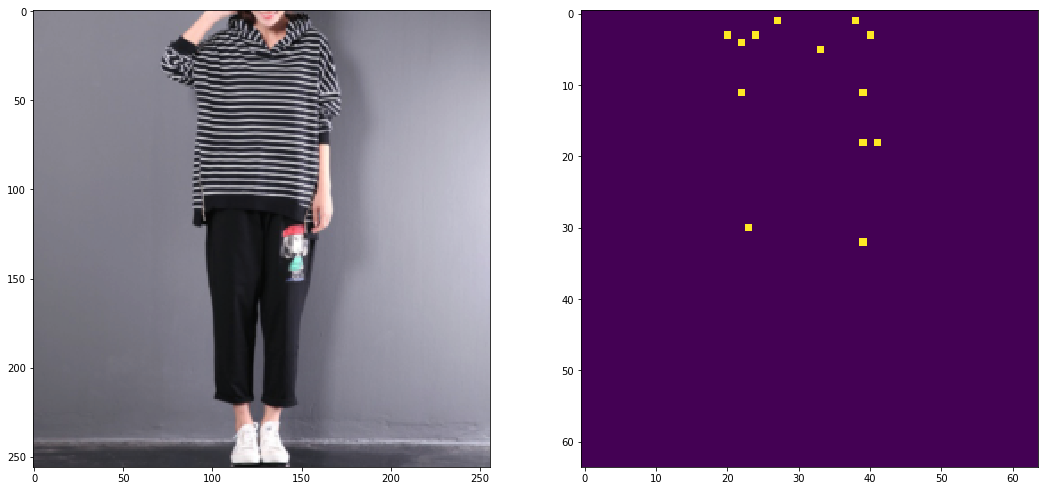

In [5]:
idx = randint(0, len(data_train) - 1)
#idx = 19629
print(data_train.dataset.df.iloc[idx])
show_data(*data_train[idx])

In [6]:
import torch
import torch.nn as nn

model = CascadePyramidNet(24)
#model.load_state_dict(torch.load("w.h5"))
loss_fn = LossWithMask(nn.MSELoss())
optim = torch.optim.Adam(model.parameters(), lr=0.0001)

solver = Solver(model, optim, loss_fn, loss_fn)

In [7]:
solver.fit(data_train, 1, batch_size=16, print_cnt=50)

total:31631, n_train:31631, n_val:0
epoch:1 2.0%, loss:0.00357491010800004, time:10s
epoch:1 4.0%, loss:0.0024403443094342947, time:19s
epoch:1 6.1%, loss:0.002076423494145274, time:28s
epoch:1 8.1%, loss:0.0017891963943839073, time:37s
epoch:1 10.1%, loss:0.0015101863536983728, time:47s
epoch:1 12.1%, loss:0.0014565972378477454, time:56s
epoch:1 14.2%, loss:0.0013434728607535362, time:65s
epoch:1 16.2%, loss:0.0011912925401702523, time:74s
epoch:1 18.2%, loss:0.0011706285877153277, time:83s
epoch:1 20.2%, loss:0.001082513015717268, time:93s
epoch:1 22.3%, loss:0.001048285630531609, time:102s
epoch:1 24.3%, loss:0.0009865791071206331, time:111s
epoch:1 26.3%, loss:0.0009395391680300236, time:120s
epoch:1 28.3%, loss:0.0009039876749739051, time:129s
epoch:1 30.3%, loss:0.0008609651122242212, time:139s
epoch:1 32.4%, loss:0.0008470718748867512, time:148s
epoch:1 34.4%, loss:0.000793510873336345, time:157s
epoch:1 36.4%, loss:0.0008075174991972744, time:166s
epoch:1 38.4%, loss:0.00076089

In [8]:
torch.save(model.state_dict(), "w.h5")

In [9]:
model.load_state_dict(torch.load("w.h5"))

image_id            Images/trousers/8cc2d4da6b44c0c9ef1662451d092e...
image_category                                               trousers
neckline_left                                            [-1, -1, -1]
neckline_right                                           [-1, -1, -1]
center_front                                             [-1, -1, -1]
shoulder_left                                            [-1, -1, -1]
shoulder_right                                           [-1, -1, -1]
armpit_left                                              [-1, -1, -1]
armpit_right                                             [-1, -1, -1]
waistline_left                                           [-1, -1, -1]
waistline_right                                          [-1, -1, -1]
cuff_left_in                                             [-1, -1, -1]
cuff_left_out                                            [-1, -1, -1]
cuff_right_in                                            [-1, -1, -1]
cuff_right_out      

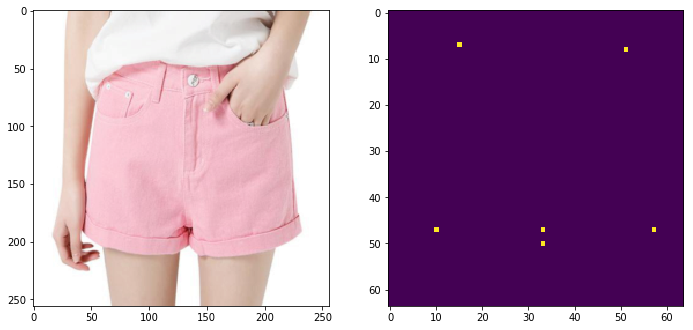

tensor([[[ -1,  -1,  -1],
         [ -1,  -1,  -1],
         [ -1,  -1,  -1],
         [ -1,  -1,  -1],
         [ -1,  -1,  -1],
         [ -1,  -1,  -1],
         [ -1,  -1,  -1],
         [ -1,  -1,  -1],
         [ -1,  -1,  -1],
         [ -1,  -1,  -1],
         [ -1,  -1,  -1],
         [ -1,  -1,  -1],
         [ -1,  -1,  -1],
         [ -1,  -1,  -1],
         [ -1,  -1,  -1],
         [274, 402,   0],
         [379, 147,   0],
         [ -1,  -1,  -1],
         [ -1,  -1,  -1],
         [244, 349,   0],
         [252, 379,   0],
         [ 79, 364,   0],
         [ 57, 409,   0],
         [439, 364,   0]]], dtype=torch.int32)


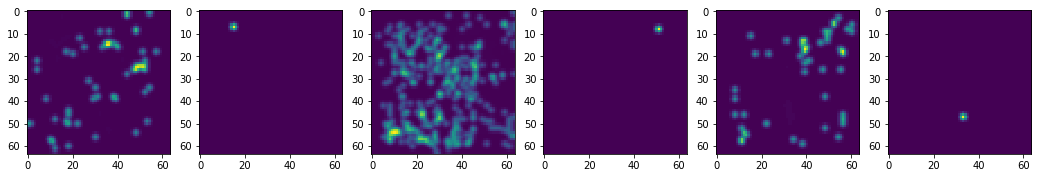

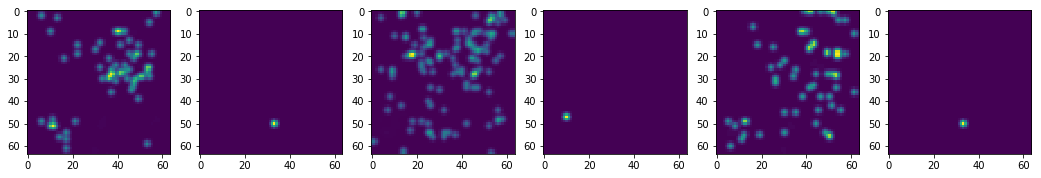

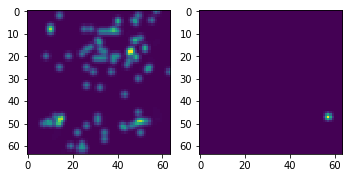

In [13]:
idx = randint(0, len(data_train) - 1)
#idx = 19629
print(data_train.dataset.df.iloc[idx])

x, y = data_train[idx]
show_data(x, y, model(x.unsqueeze(0).cuda())[1].squeeze(0).cpu())